# Notebook 12 — Model Evaluation & Validation (Solutions)

## Exercise 1 — Train/Test Split

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.3f}")

# Train/test split alone can be misleading because results depend on the split;
# cross-validation gives more robust performance estimates.

Test Accuracy: 1.000


## Exercise 2 — Cross-Validation

In [2]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

clf = LogisticRegression(max_iter=200)

# K-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_kf = cross_val_score(clf, X, y, cv=kf)
print(f"K-Fold CV Accuracy: {scores_kf.mean():.3f}")

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skf = cross_val_score(clf, X, y, cv=skf)
print(f"Stratified K-Fold CV Accuracy: {scores_skf.mean():.3f}")

# Stratification ensures class balance across folds, important for imbalanced datasets.

K-Fold CV Accuracy: 0.973
Stratified K-Fold CV Accuracy: 0.967


## Exercise 3 — Classification Metrics

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# If false negatives are costly (e.g., missing cancer cases), prioritize Recall.

Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1-score: 0.9771689497716894
ROC-AUC: 0.9968400940623163


## Exercise 4 — Regression Metrics

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

# MAE is often the most interpretable for business stakeholders since it's in the same units as the target.

MSE: 0.25650512920799395
RMSE: 0.5064633542597075
MAE: 0.33228759407299757
R²: 0.8045734925119942


## Exercise 5 — Bias-Variance Tradeoff

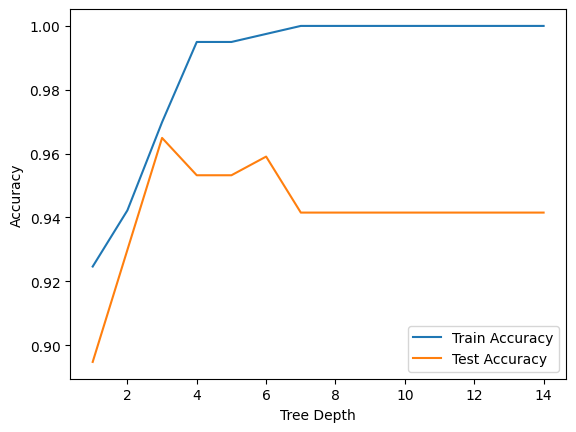

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Load classification data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_scores, test_scores = [], []
depths = range(1, 15)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Exercise 6 — Learning Curves

/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

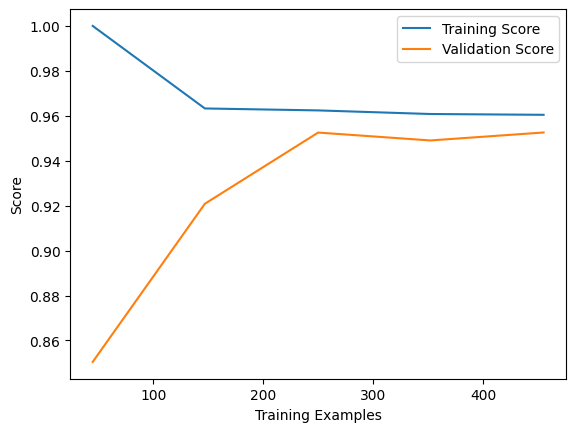

In [6]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(LogisticRegression(max_iter=500), X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.show()

# Large gap = high variance (overfitting). Close curves = low variance, possible high bias.

## Exercise 7 — Validation Curves

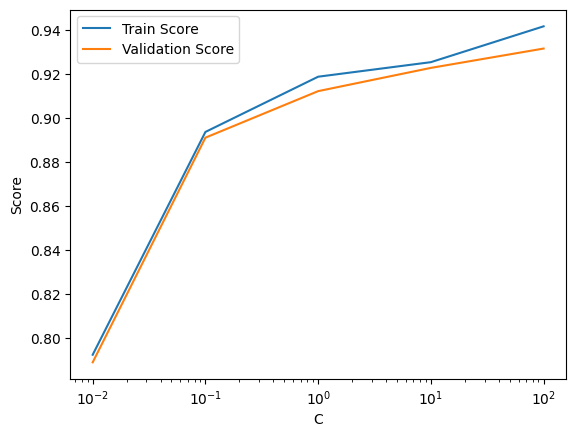

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = [0.01, 0.1, 1, 10, 100]
train_scores, val_scores = validation_curve(SVC(), X, y, param_name="C", param_range=param_range, cv=5)

plt.plot(param_range, np.mean(train_scores, axis=1), label="Train Score")
plt.plot(param_range, np.mean(val_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()
plt.show()

# Optimal C is where validation score peaks.